## IT Training Assignment Class 4

In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

###Task 01: 1D & 2D Array Operations

In [2]:
# Create a 1D and 2D array (Global Variables)
array_1d = np.array([1, 2, 3, 4, 5])
array_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Output the arrays
print("1D Array:\n", array_1d)
print("2D Array:\n", array_2d)

# Implement a function for Basic array Operations
def basic_array_operations():
    print("Sum of 1D Array:", np.sum(arr_1d))
    print("Mean of 2D Array:", np.mean(arr_2d))
    print("Transpose of 2D Array:\n", arr_2d.T)

# Create global array variables
global arr_1d, arr_2d

arr_1d = np.array([1, 2, 3, 4, 5])
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Call basic array operations function
basic_array_operations()


1D Array:
 [1 2 3 4 5]
2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
Sum of 1D Array: 15
Mean of 2D Array: 5.0
Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


###Task 02: Image Processing with NumPy


In [3]:
# Implement a function to create and crop the image using local variables
def image_processing():
    # Create a grayscale image using a 2D NumPy array
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)

    print("Original Image:\n", image)

    # Crop the image
    cropped = image[1:4, 1:4]
    # Invert colors
    inverted_image = 255 - image

    print("Cropped Section:\n", cropped)
    print("Inverted Image:\n", inverted_image)

# Call the image processing function
image_processing()

Original Image:
 [[247  70 130  74  93]
 [ 61 215 215 255  79]
 [214 223 204  46  56]
 [208 166 165  16 244]
 [249 246 106   0  20]]
Cropped Section:
 [[215 215 255]
 [223 204  46]
 [166 165  16]]
Inverted Image:
 [[  8 185 125 181 162]
 [194  40  40   0 176]
 [ 41  32  51 209 199]
 [ 47  89  90 239  11]
 [  6   9 149 255 235]]


###Task 03: Augmented Reality Transformation


Saving Untitled design.png to Untitled design (1).png
Original Image


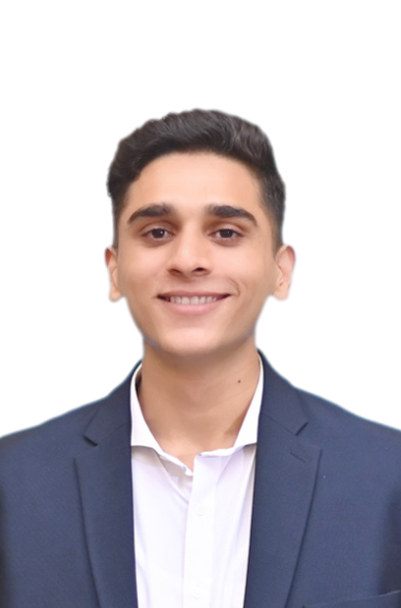

Scaled Image


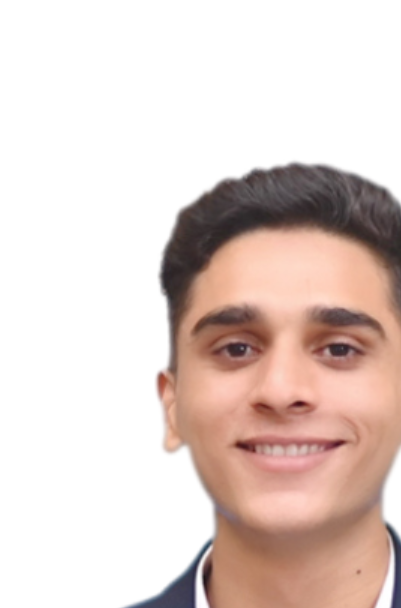

Rotated Image


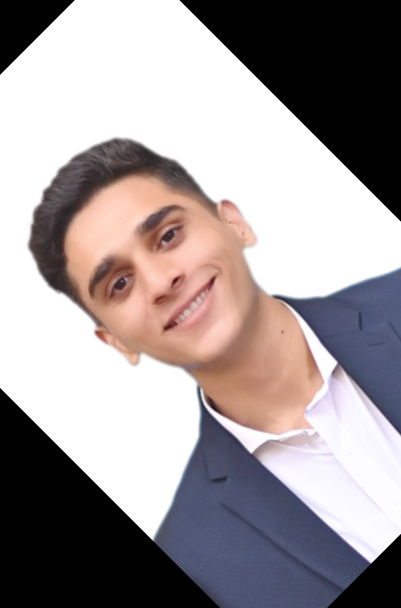

Translated Image


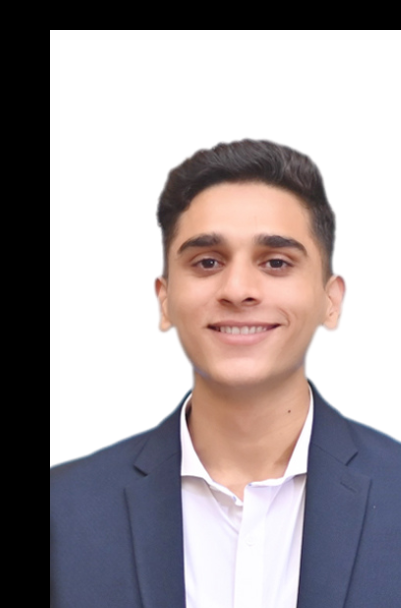

In [4]:
# Upload image from Colab
from google.colab import files
uploaded = files.upload()

# Load image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

# Implement a function to scale image by a scale factor
def scale_image(image, scale_factor):
    rows, cols = image.shape[:2]
    scaling_matrix = np.array([[scale_factor, 0, 0],
                               [0, scale_factor, 0],
                               [0, 0, 1]])
    scaled_image = cv2.warpPerspective(image, scaling_matrix, (cols, rows))
    return scaled_image

# Implement a function to rotate an image by a given angle
def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Implement a function to translate an image
def translate_image(image, tx, ty):
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    rows, cols = image.shape[:2]
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

# Apply all transformations
scaled_image = scale_image(image, 1.5)
rotated_image = rotate_image(image, 45)
translated_image = translate_image(image, 50, 30)

# Display images
print("Original Image")
cv2_imshow(image)

print("Scaled Image")
cv2_imshow(scaled_image)

print("Rotated Image")
cv2_imshow(rotated_image)

print("Translated Image")
cv2_imshow(translated_image)

###Task 04: Face Detection from Image Arrays


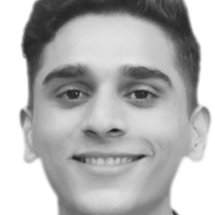

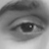

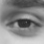

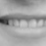

Detected Face


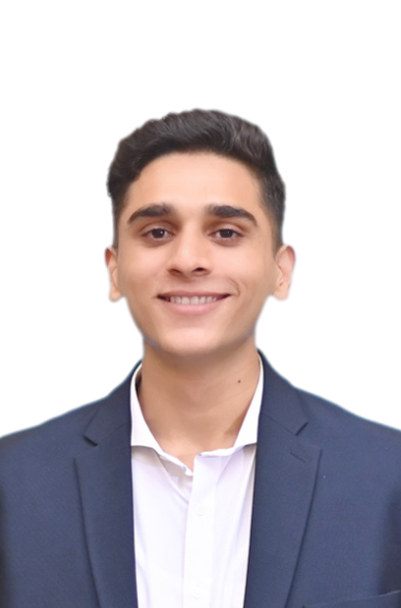

In [5]:
# Convert image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pretrained Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)

# Loop through detected faces and extract facial features
for (x, y, w, h) in faces:
    face_roi = image_gray[y:y+h, x:x+w]
    cv2_imshow(face_roi)

    # Detect eyes
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    eyes = eyes_cascade.detectMultiScale(face_roi, scaleFactor=1.1, minNeighbors=5)

    # Display eyes
    for (ex, ey, ew, eh) in eyes:
        eye_roi = face_roi[ey:ey+eh, ex:ex+ew]
        cv2_imshow(eye_roi)

print("Detected Face")
cv2_imshow(image)